### Problem Statement:

Analyzing UK traffic accident data to uncover correlations between road conditions, weather, and accident severity, while also identifying temporal patterns and spatial hotspots for targeted interventions.

##### Step 1: Data Loading

In [27]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the CSV file 
data = pd.read_csv("C:/Users/hp/OneDrive/Documents/Datasets/accident_data.csv")

In [6]:
# Creatimg DataFrame from the loaded data
df = pd.DataFrame(data)

# Displaying the first few rows of the DataFrame
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


##### Step 2: Data Exploration

In [7]:
# Summary statistics of numerical variables
print(df.describe())


            Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles
count  660654.000000  660653.000000         660679.000000       660679.000000
mean       52.553866      -1.431210              1.357040            1.831255
std         1.406922       1.383330              0.824847            0.715269
min        49.914430      -7.516225              1.000000            1.000000
25%        51.490690      -2.332291              1.000000            1.000000
50%        52.315641      -1.411667              1.000000            2.000000
75%        53.453452      -0.232869              1.000000            2.000000
max        60.757544       1.762010             68.000000           32.000000


In [8]:
# Count of unique values in each column
print(df.nunique())



Index                      421020
Accident_Severity               3
Accident Date                1461
Latitude                   511618
Light_Conditions                5
District Area                 422
Longitude                  529766
Number_of_Casualties           36
Number_of_Vehicles             19
Road_Surface_Conditions         5
Road_Type                       5
Urban_or_Rural_Area             3
Weather_Conditions              8
Vehicle_Type                   16
dtype: int64


In [10]:
# Information about DataFrame including data types and non-null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

##### Step 3: Data Cleaning

In [12]:
# Check for missing values
data.isnull().sum()


Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [17]:
# Imputing missing values in the 'Road_Type' column with the mode
data['Road_Type'].fillna(data['Road_Type'].mode()[0], inplace=True)

# Impute missing values for 'Road_Surface_Conditions' with mode
data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0], inplace=True)


In [18]:
#Manually impute missing values 
data.loc[data['Weather_Conditions'].isnull(), 'Weather_Conditions'] = 'Clear'  

In [20]:
# Dropping rows with missing values for 'Longitude', 'Latitude', and 'Urban_or_Rural_Area' 
# since the missing values are relatively few and filling them may not be meaningful or accurate

data.dropna(subset=['Longitude', 'Latitude', 'Urban_or_Rural_Area'], inplace=True)

In [85]:
df1 = df.head()
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Clear,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Clear,Other vehicle


##### Step 4: Data Visualization & Interpretation

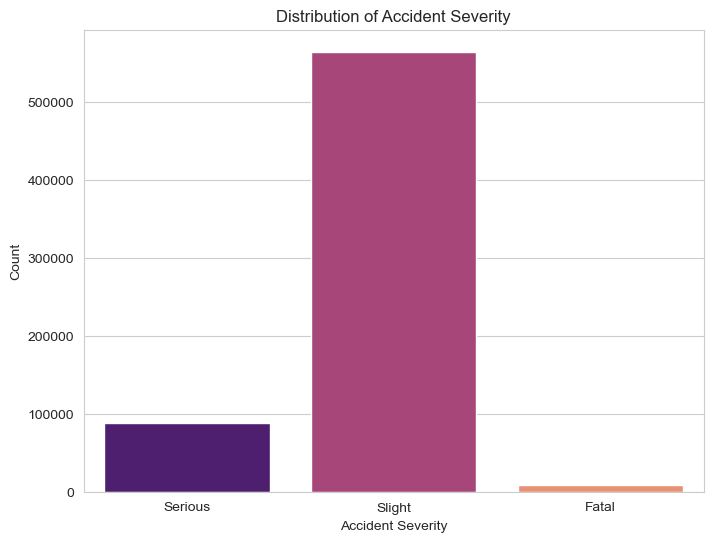

In [79]:
# Visualizing accident severity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data, palette='magma')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


In summary, Slight accidents are the most frequent, followed by serious accidents and then fatal accidents. This suggests that most accidents result in minor injuries or damages, with fewer incidents leading to severe outcomes.

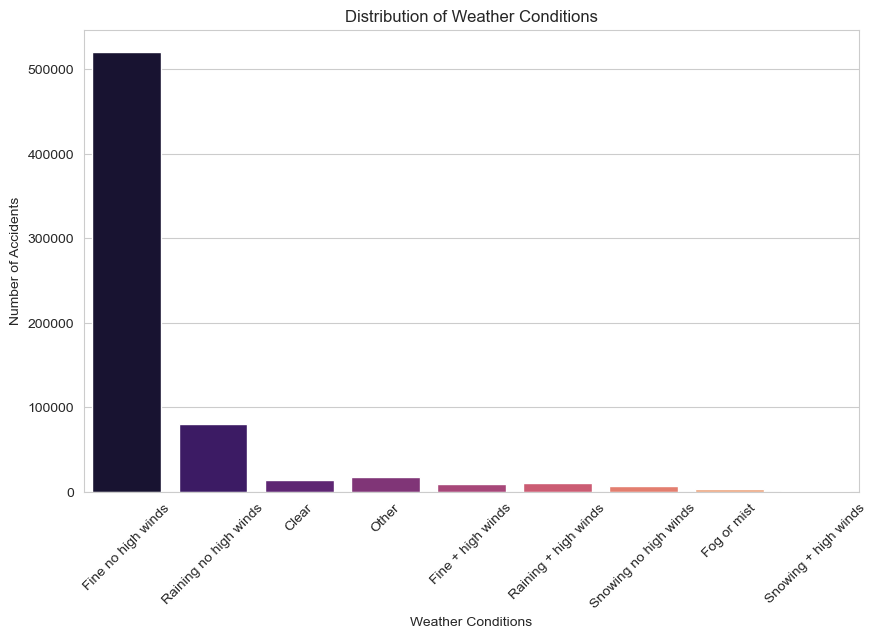

In [78]:
# Analyzing patterns related to weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions',palette='magma')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


The bar graph illustrates that clear weather conditions correlate with the highest accident count, surpassing those during rain, snow, fog, or high winds. 

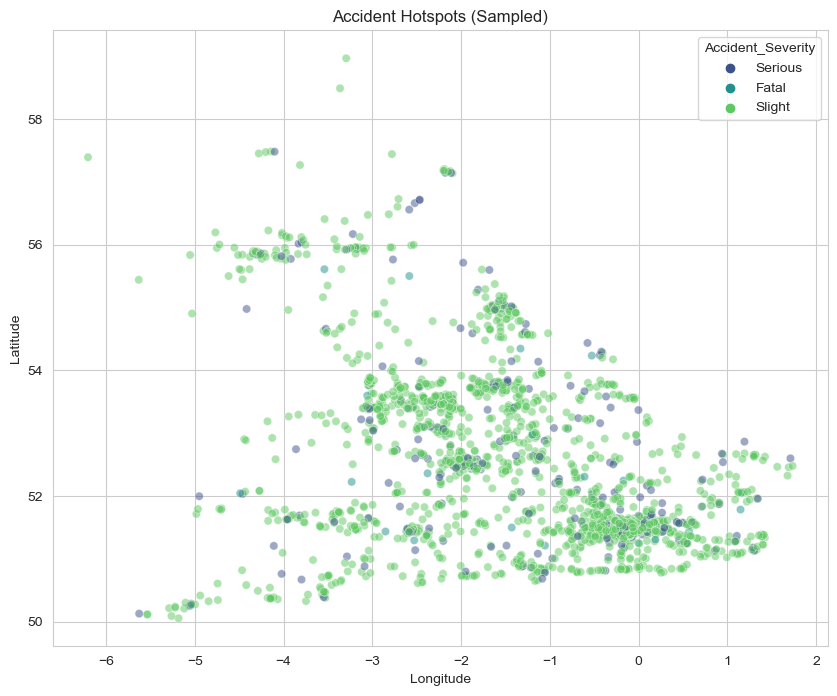

In [86]:
# Taking a random sample of the data
sample_size = 2000 
sampled_data = data.sample(n=sample_size, random_state=42)

# Visualizing accident hotspots using the sampled data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_data, x='Longitude', y='Latitude', hue='Accident_Severity', palette='viridis', alpha=0.5)
plt.title('Accident Hotspots (Sampled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatter plot indicates that slight accidents (green dots) are more common than serious accidents (blue dots), with certain geographic areas showing higher accident rates. This highlights the need for targeted safety measures in these hotspots. The absence of fatal accidents on the graph could signal effective safety measures or data limitations.

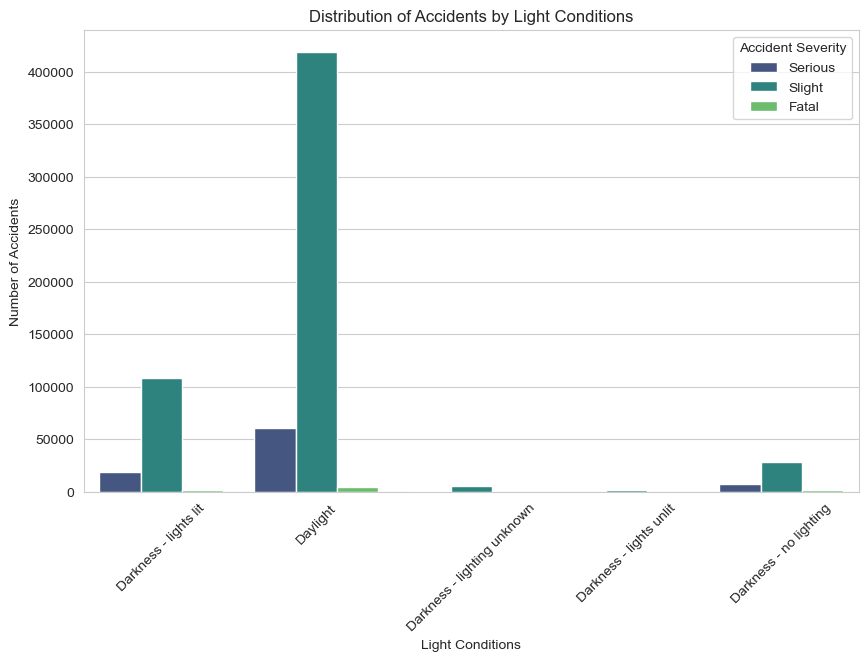

In [77]:
# Visualizing contributing factors 
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Light_Conditions', hue='Accident_Severity',palette='viridis')
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()


The bar graph illustrates that daylight has the most accidents, primarily slight ones. Accidents in lit darkness follow, with serious incidents slightly outnumbering slight and fatal ones. Few accidents occur in unlit darkness or with unknown lighting. This suggests street lighting reduces accident severity, but factors beyond light conditions, like traffic volume or driver behavior, influence accident frequency.

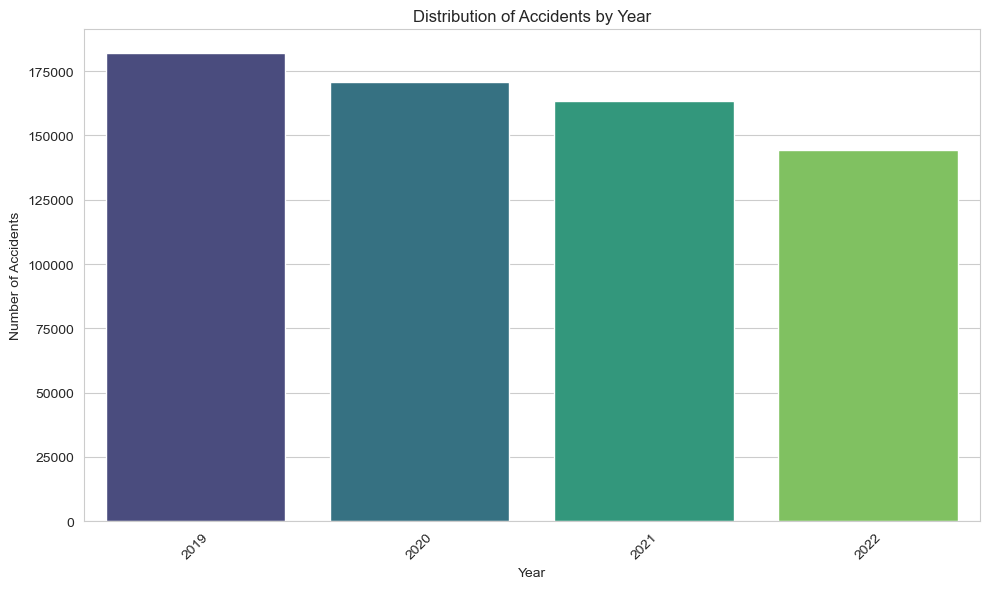

In [75]:
#Visualizing the distribution of accidents by year
data['Accident Date'] = pd.to_datetime(data['Accident Date'], format='%d-%m-%Y')

# Extract year from the accident date
data['Year'] = data['Accident Date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year', palette='viridis')
plt.title('Distribution of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


The US accident dataset reveals a consistent decline in accidents from 2019 to 2022. The peak occurred in 2019, with over 175,000 accidents, followed by slight reductions in subsequent years. Factors contributing to this trend could include enhanced road safety measures, advancements in vehicle technology, and shifts in driving habits. External factors like the pandemic may have also played a role in reducing accidents due to decreased travel.






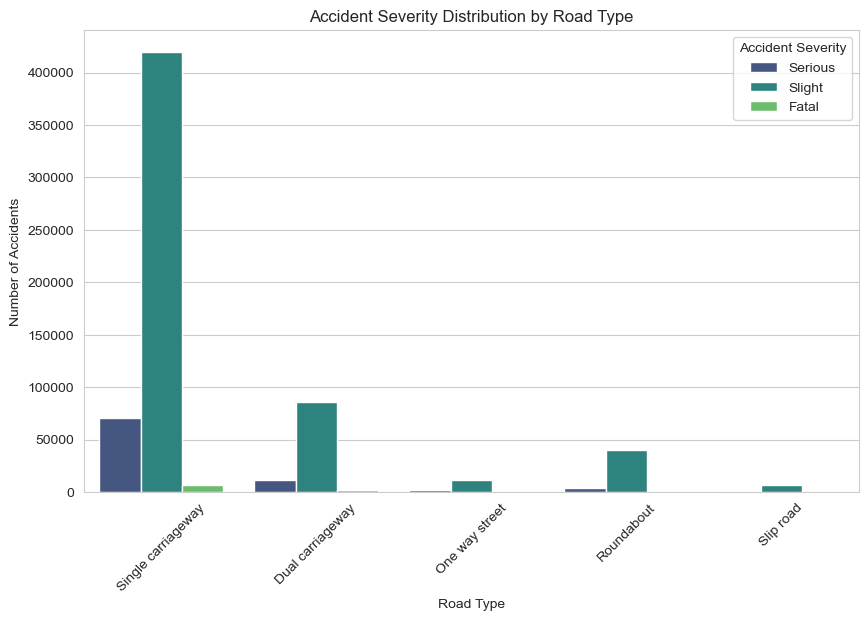

In [74]:
# Accident Severity Distribution by Road Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type', hue='Accident_Severity', palette='viridis')
plt.title('Accident Severity Distribution by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()


The bar graph reveals that single carriageways have the highest accident rates, particularly serious ones. Dual carriageways and one-way streets follow, but with fewer accidents. Roundabouts are the safest, with minimal accidents and no fatalities.

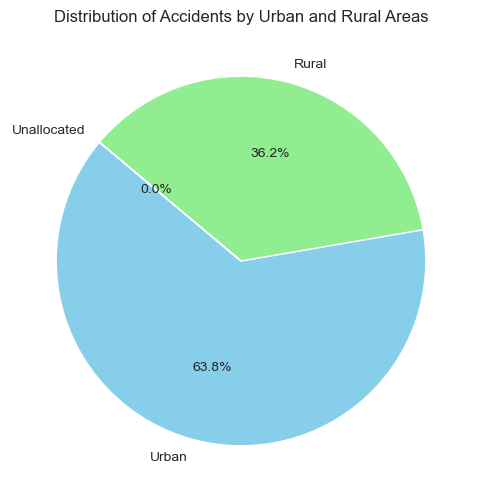

In [67]:
#visualizing the distribution of accidents by urban and rural areas.
urban_rural_counts = data['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Accidents by Urban and Rural Areas')
plt.axis() 
plt.show()



The US accident dataset's pie chart shows 63.8% of accidents occur in urban areas, with 36.2% in rural areas. This highlights the higher incidence of accidents in urban settings, likely due to increased traffic density and complex road systems.

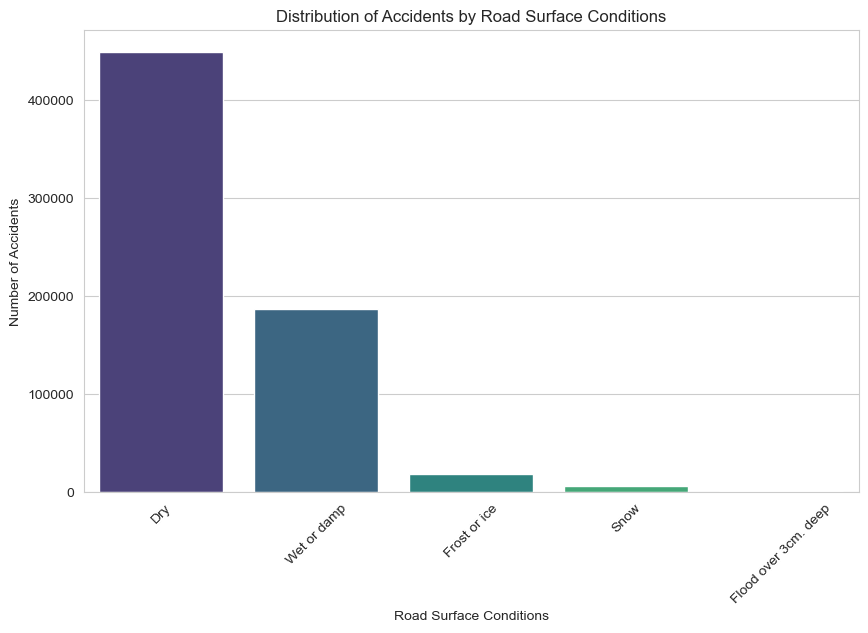

In [68]:
#visualizing number of accidents for each road surface condition
road_surface_counts = data['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=road_surface_counts.index, y=road_surface_counts.values, palette='viridis')
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


The bar graph of the US accident dataset shows that most accidents occur on dry road surfaces, with over 400,000 incidents, followed by wet conditions with around 150,000 incidents. Frost, ice, snow, and flood conditions have the fewest accidents, each under 50,000 incidents. 

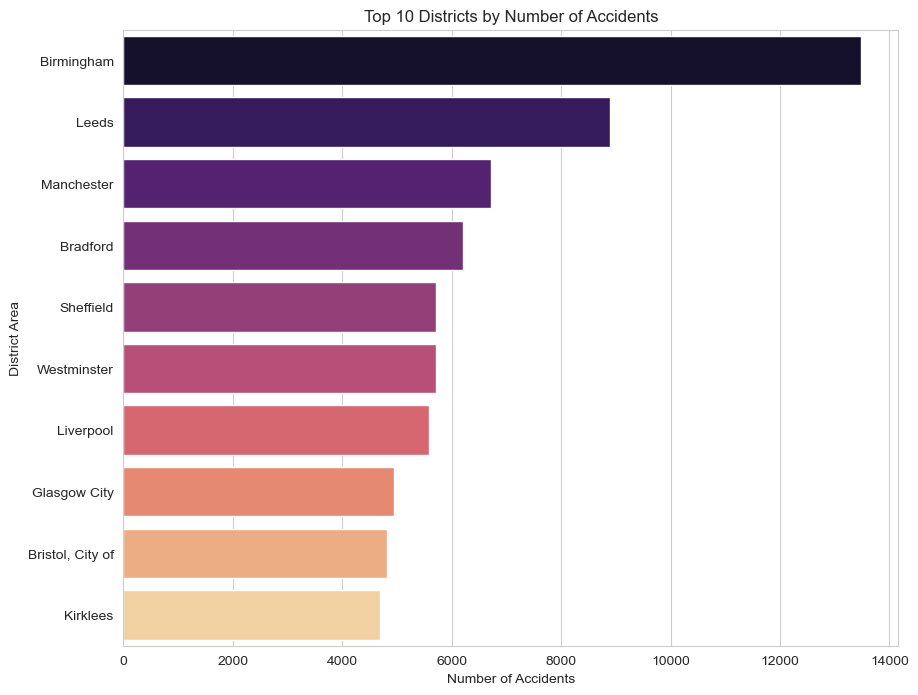

In [73]:
# Visualizing top 10 Districts by Number of Accidents
top_n = 10
district_counts = data['District Area'].value_counts().sort_values(ascending=False)
top_districts = district_counts.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_districts.values, y=top_districts.index, palette='magma')
plt.title(f'Top {top_n} Districts by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('District Area')
plt.show()



The US accident dataset's bar graph highlights Birmingham as having the highest accident count among the top 10 districts, followed by Leeds and Manchester. Kirklees records the fewest accidents in this group. 

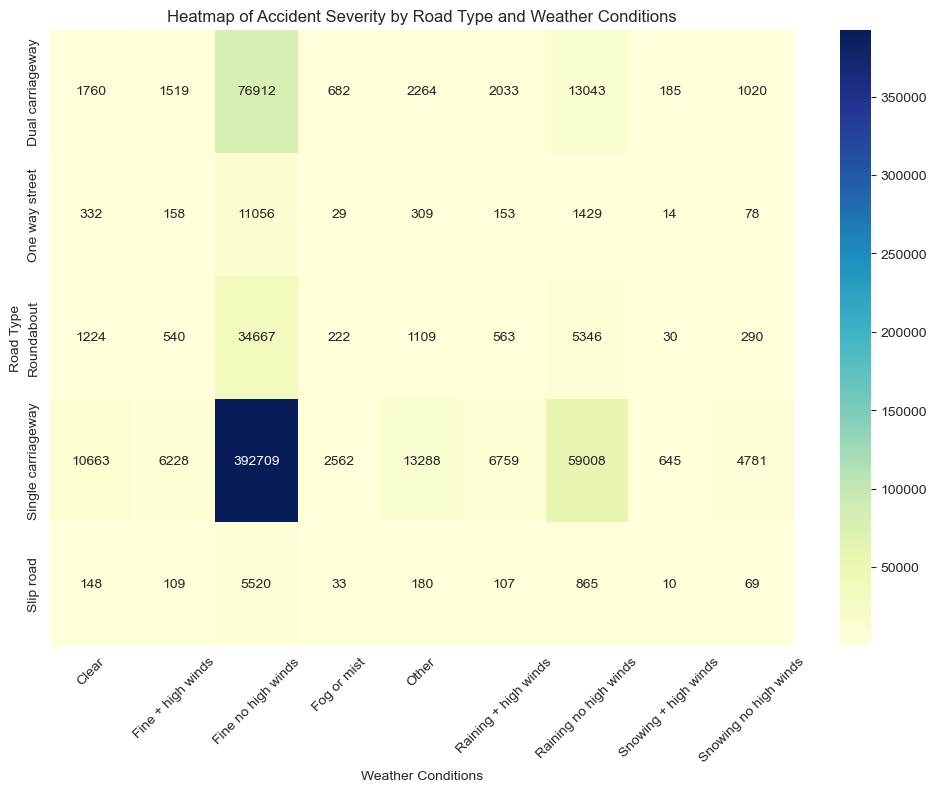

In [87]:
#visualizing the count of accidents categorized by road type and weather conditions.
heatmap_data = data.pivot_table(index='Road_Type', columns='Weather_Conditions', values='Accident_Severity', aggfunc='count')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Accident Severity by Road Type and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Road Type')
plt.xticks(rotation=45)
plt.show()


The heatmap shows that most US accidents happen on single carriageway roads in clear weather. Rain or snow increases accidents but clear days see more. Single carriageways are accident-prone, emphasizing the need for tailored safety measure